In [2]:
import pandas as pd
import warnings
# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

### 실습에 주로 활용할 데이터 셋
- https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets

### iris 데이터 셋
- 꽃 종류 분리하기

In [3]:
from sklearn.datasets import load_iris

In [4]:
# iris 데이터셋을 로드합니다.
iris = load_iris()

- DESCR : 데이터셋의 정보를 보여줍니다.
- data : feature data
- feature_names : feature data의 컬럼이름
- target : label data(수치형)
- target_names : label의 이름(문자형)

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 데이터 프레임 만들기

In [12]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [15]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df_iris['target'] = target

In [17]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 시각화

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

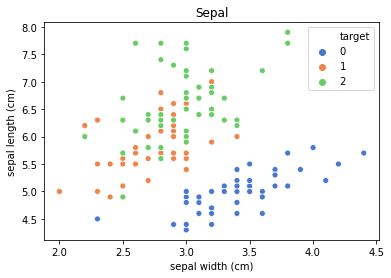

In [21]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

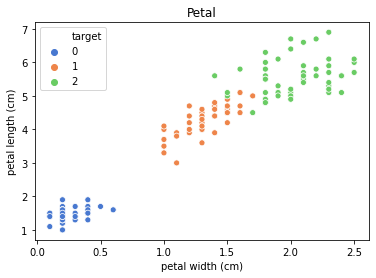

In [22]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris )
plt.title('Petal')
plt.show()

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

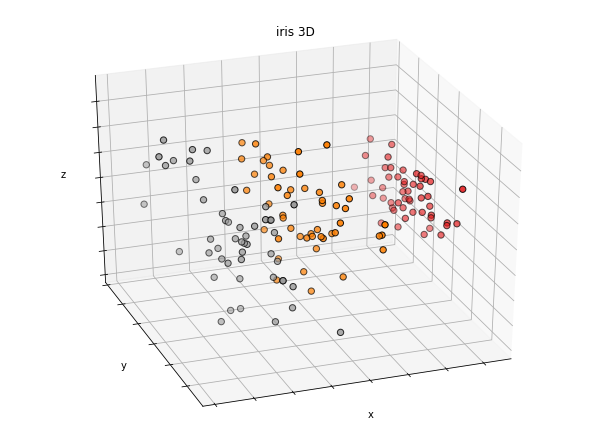

In [27]:
fig = plt.figure(figsize = (8,6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:,0], X_reduced[:,1],X_reduced[:,2],c=df_iris['target'], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("iris 3D")
ax.set_xlabel('x')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('y')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('z')
ax.w_zaxis.set_ticklabels([])
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'])

In [30]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [34]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

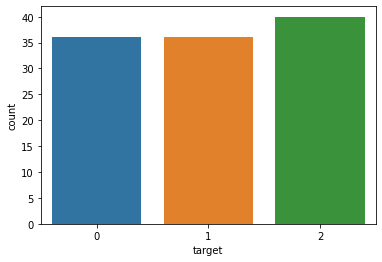

In [35]:
sns.countplot(y_train)

stratify: label의 클래스의 분포를 균등하게 배분하는 방법

In [37]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'],stratify = df_iris['target'])

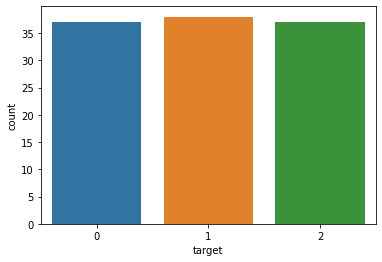

In [38]:
sns.countplot(y_train)

In [39]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [40]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [50]:
# 학습하기
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [51]:
# 평가하기
y_pred = clf.predict(x_valid)
print('정답률 :', accuracy_score(y_valid, y_pred))

정답률 : 0.9473684210526315


### Logistic Regression

- 로지스틱 회귀는 영국의 통계학자인 D.R.COX가 1958년에 제안한 확률 모델입니다.
- 독립변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계기법입니다.

LogisticRegression, 서포트 벡터 머신(SVM)과 같은 알고리즘은 이진 분류만 가능합니다.
(2개의 클래스 판별만 가능합니다.) 하지만, 3개 이상의 클래스에 대한 판별을 진행할 경우 아래와 같은 전략으로 판별하게 됩니다.

- one-vs-rest(OvR) : K개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 k개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 판별
- one-vs-one(OvO) : 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, Ovs1,Ovs2,Ovs3 ...2vs3까지 NX(N-1)/2개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별
- 대부분 OvsR 전략을 선호합니다.

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
#모델 선언
model = LogisticRegression()

In [55]:
# 모델 학습
model.fit(x_train, y_train)

LogisticRegression()

In [56]:
# 예측
prediction = model.predict(x_valid)

In [57]:
prediction[:5]

array([2, 2, 2, 1, 2])

In [58]:
# 평가
(prediction == y_valid).mean()

0.9473684210526315